In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

## Loading and Discovery of Datasets


In [3]:
sensor_df = pd.read_csv('pai_sensor_table.csv')
machine_spec = pd.read_csv('pai_machine_spec.csv')
task_df = pd.read_csv('pai_task_table.csv')

FRACTION = 0.3
sensor_df = sensor_df.sample(frac=FRACTION, random_state=42)
task_df = task_df.sample(frac=FRACTION, random_state=42)

print(f"Sensor data: {sensor_df.shape}")
print(f"Machine specs: {machine_spec.shape}")
print(f"Tasks: {task_df.shape}")

Sensor data: (909970, 16)
Machine specs: (1897, 5)
Tasks: (378315, 10)


In [61]:
print(f" Sensor: {sensor_df.info()}")

print(f"Machine spec: {machine_spec.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 909970 entries, 2948397 to 1153773
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   job_name         909970 non-null  object 
 1   task_name        909970 non-null  object 
 2   worker_name      909970 non-null  object 
 3   inst_id          909970 non-null  object 
 4   machine          909970 non-null  object 
 5   gpu_name         909970 non-null  object 
 6   cpu_usage        908251 non-null  float64
 7   gpu_wrk_util     909970 non-null  float64
 8   avg_mem          909615 non-null  float64
 9   max_mem          909970 non-null  float64
 10  avg_gpu_wrk_mem  909970 non-null  float64
 11  max_gpu_wrk_mem  909970 non-null  float64
 12  read             909969 non-null  float64
 13  write            909969 non-null  float64
 14  read_count       909969 non-null  float64
 15  write_count      909969 non-null  float64
dtypes: float64(10), object(6)
memory usa

In [6]:
machine_spec.head(5)

,machine,gpu_type,cap_cpu,cap_mem,cap_gpu
0,7399a758eb02bae1a3621236,CPU,96,512,0
1,75c536d5ba60528b3ef3ae40,CPU,96,512,0
2,6265a99de1a50cc6f1b03602,CPU,96,512,0
3,cb5c703eae0a123ad25e480d,CPU,96,512,0
4,fc6921f2af20c5337c43d4a9,CPU,96,512,0


In [7]:
sensor_df.head(5)

,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
2948397,75f73fe78f536e6949d51317,worker,6d0e6ae18421d272692c3afdc117200d7dda2274d1ecc5...,053335a1a807d5e1d66684fa0f08bd0ba40a0b1cfb208e...,bb098219cbd23ff558c89ef5,/dev/nvidia2,79.853607,97.175090,2.659483,2.723633,2.250840,2.258789,9.442979e+06,2.430609e+06,516.018601,224.779116
1153074,5c94fccdd4daae7f7462af58,PyTorchWorker,ff378f7a9f10ea5e74aa2ab42d2601b799cce641a6e166...,15c677f1eae052ba7e258936fc34f60fb2ba55e34f69ad...,f7463287bb20a802d3054f5f,/dev/nvidia3,3.231884,0.000000,0.449851,0.458984,0.000000,0.000000,1.258566e+07,1.818162e+07,1175.328767,1101.479452
1533333,1c773dde500011fd9f2af71f,worker,2599ae23d5d91f251f52d250276582e65949b375a4abe3...,da1d9b7634eb46369b651dc7dc8594580b13ee71cfe0d1...,8a4f160727164afc23722b4f,/dev/nvidia1,98.272727,1.029412,1.671786,2.960938,1.234806,2.553711,3.451016e+07,1.593236e+07,3183.264706,1559.352941
226598,0d6ce2f6e4b56e9ae3ad0763,PyTorchWorker,7f1250f04dabb17c488d84149c228d2a5e9d043406cd7f...,f06901ab6e3188a1e08e618d1bd93ea5c990e8e92148cd...,e1aa816efb68c4af9775bbeb,/dev/nvidia1,126.878982,0.308792,29.200848,47.266602,3.288136,3.295898,4.013793e+08,1.525514e+06,9849.490801,2586.363466
2958831,fcf5c2cd53699d9ee1eef809,worker,0572c835b8e422f356b1b5e0276a410607bd53f477987f...,f52d81ca970674b9f0bf2463221a893e022a86cbb18a42...,db0c9099a2c4c67d891b38a3,/dev/nvidia2,108.983607,0.000000,5.760153,7.527344,0.478934,0.711914,1.485261e+08,1.694187e+08,7385.123077,508074.646154


## Infos datasets

In [5]:
print(sensor_df['cpu_usage'].describe())


count    908251.000000
mean        259.132426
std         567.711510
min           0.000000
25%          57.266667
50%         103.502646
75%         239.276710
max        8890.321362
Name: cpu_usage, dtype: float64


In [9]:
print(machine_spec['gpu_type'].value_counts())

gpu_type
P100       798
T4         497
MISC       280
V100M32    135
V100       104
CPU         83
Name: count, dtype: int64


## Checking for Null Values


In [10]:
missing_sensor = sensor_df.isnull().sum()

print("Sensor data:",missing_sensor[missing_sensor > 0])

missing_machine = machine_spec.isnull().sum()

print("Machine specs:",missing_machine[missing_machine > 0])

Sensor data: cpu_usage      1719
avg_mem         355
read              1
write             1
read_count        1
write_count       1
dtype: int64
Machine specs: Series([], dtype: int64)


## Merging Tables to Obtain a Complete Table


In [6]:
merged_viz = sensor_df.merge(machine_spec[['machine', 'gpu_type', 'cap_cpu']], on='machine', how='left')
merged_viz.head(10)

,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count,gpu_type,cap_cpu
0,75f73fe78f536e6949d51317,worker,6d0e6ae18421d272692c3afdc117200d7dda2274d1ecc5...,053335a1a807d5e1d66684fa0f08bd0ba40a0b1cfb208e...,bb098219cbd23ff558c89ef5,/dev/nvidia2,79.853607,97.175090,2.659483,2.723633,2.250840,2.258789,9.442979e+06,2.430609e+06,516.018601,224.779116,MISC,96.0
1,5c94fccdd4daae7f7462af58,PyTorchWorker,ff378f7a9f10ea5e74aa2ab42d2601b799cce641a6e166...,15c677f1eae052ba7e258936fc34f60fb2ba55e34f69ad...,f7463287bb20a802d3054f5f,/dev/nvidia3,3.231884,0.000000,0.449851,0.458984,0.000000,0.000000,1.258566e+07,1.818162e+07,1175.328767,1101.479452,MISC,96.0
2,1c773dde500011fd9f2af71f,worker,2599ae23d5d91f251f52d250276582e65949b375a4abe3...,da1d9b7634eb46369b651dc7dc8594580b13ee71cfe0d1...,8a4f160727164afc23722b4f,/dev/nvidia1,98.272727,1.029412,1.671786,2.960938,1.234806,2.553711,3.451016e+07,1.593236e+07,3183.264706,1559.352941,MISC,96.0
3,0d6ce2f6e4b56e9ae3ad0763,PyTorchWorker,7f1250f04dabb17c488d84149c228d2a5e9d043406cd7f...,f06901ab6e3188a1e08e618d1bd93ea5c990e8e92148cd...,e1aa816efb68c4af9775bbeb,/dev/nvidia1,126.878982,0.308792,29.200848,47.266602,3.288136,3.295898,4.013793e+08,1.525514e+06,9849.490801,2586.363466,T4,96.0
4,fcf5c2cd53699d9ee1eef809,worker,0572c835b8e422f356b1b5e0276a410607bd53f477987f...,f52d81ca970674b9f0bf2463221a893e022a86cbb18a42...,db0c9099a2c4c67d891b38a3,/dev/nvidia2,108.983607,0.000000,5.760153,7.527344,0.478934,0.711914,1.485261e+08,1.694187e+08,7385.123077,508074.646154,MISC,96.0
5,8ac7fa514de6c16ccf39b765,worker,a58aed8e7965f11b18ce3ac21a98e324223202ebf6a88b...,6ee98d2e60c7ec4bed12406836521932184d9305b650c0...,c1db4deae769b25df5a0ccae,/dev/nvidia5,442.466443,9.610561,5.916239,7.866211,2.104115,2.327148,1.202382e+09,1.061778e+07,38270.353135,14866.072607,MISC,96.0
6,1d02c25e3332beb56738b972,worker,7febe88f84dbe75eed1c0a0d776b66cbe070d4b071f49f...,0f56bd9fafd255568108c9ef40d00668e81ef3632bbfb3...,1d8ba7afd528f5584982e05b,/dev/nvidia0,206.767106,2.934183,8.184465,9.687500,7.839122,7.967773,1.877793e+09,3.605603e+06,24548.794230,10880.698345,P100,64.0
7,1b4c46bb73e023a647a7a7a2,tensorflow,f17268c10bf94f6a9400943e0abeab1f39f1b38ae82801...,c080231203b327f68cc5b9f62f7e020c8601c4e1b86ad1...,c562346775b25205e47224f8,/dev/nvidia1,83.000000,0.000000,0.149609,0.340820,0.140788,0.168945,3.211682e+07,1.185986e+07,10744.142857,1328.000000,MISC,96.0
8,f1946fb8a42c72c92b559878,worker,51f9b9f1786385f058ce55452a42eb800ee39f00bf253d...,ab24152ba655b8d1387854a6ec35eefeaeaede18bc03ae...,40abf2418246bccc580433bd,/dev/nvidia7,202.072289,16.100478,5.135791,11.872070,1.994283,4.334961,5.609332e+07,3.321333e+07,13497.513126,2609.045346,MISC,96.0
9,2275ac67434209987be106c5,worker,f137ab3a3492462cad8b79af79b6cf3c98f608c935f594...,dc71cd4dad9c70e199b9f85fcc185334be49283c71017e...,d11f253a9d15ccc38f8df606,/dev/nvidia7,31.066667,0.000000,0.300437,0.461914,0.039350,0.133789,4.478016e+07,4.602939e+07,10373.157895,4882.842105,MISC,96.0


## Initial Visualizations to Identify Relationships Between Columns


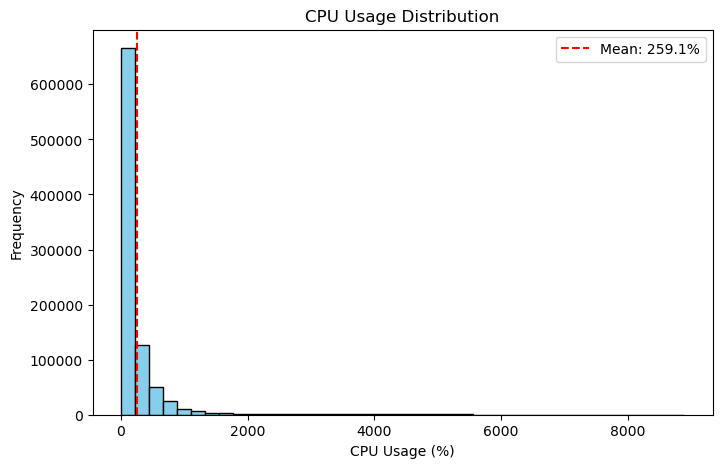

In [94]:
plt.figure(figsize=(8, 5))
plt.hist(sensor_df['cpu_usage'].dropna(), bins=40, color='skyblue', edgecolor='black')
plt.axvline(sensor_df['cpu_usage'].mean(), color='red', linestyle='--', label=f"Mean: {sensor_df['cpu_usage'].mean():.1f}%")
plt.title("CPU Usage Distribution")
plt.xlabel("CPU Usage (%)")
plt.ylabel("Frequency")
plt.legend()

plt.savefig('cpu_distribution.png', dpi=300, bbox_inches='tight')
plt.show()  


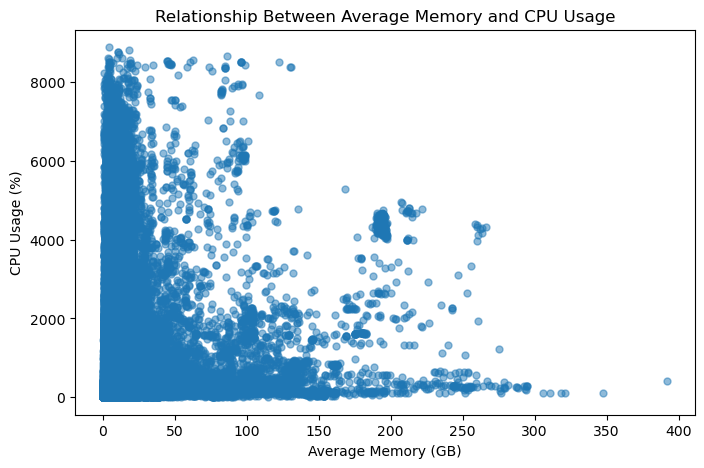

In [95]:
plt.figure(figsize=(8, 5))
plt.scatter(sensor_df['avg_mem'], sensor_df['cpu_usage'], alpha=0.5, s=25)
plt.title("Relationship Between Average Memory and CPU Usage")
plt.xlabel("Average Memory (GB)")
plt.ylabel("CPU Usage (%)")


plt.savefig('memory_cpu_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


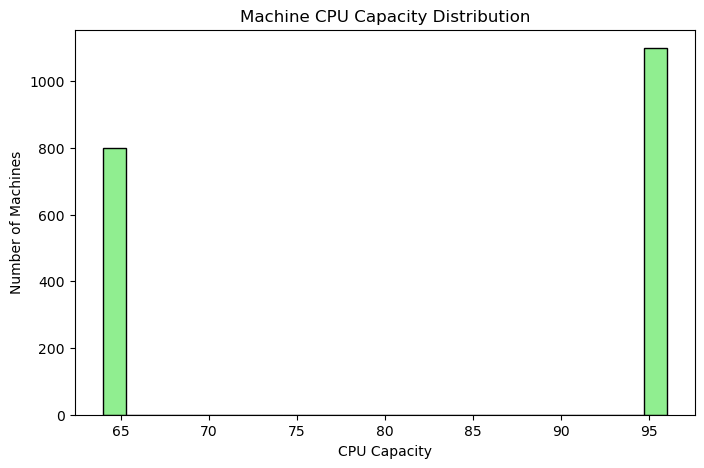

In [88]:
plt.figure(figsize=(8, 5))
plt.hist(machine_spec['cap_cpu'].dropna(), bins=25, color='lightgreen', edgecolor='black')
plt.title("Machine CPU Capacity Distribution")
plt.xlabel("CPU Capacity")
plt.ylabel("Number of Machines")
plt.show()

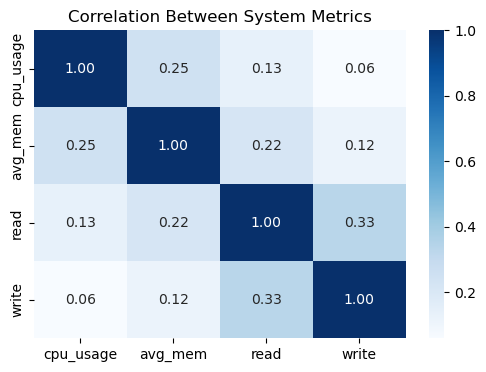

In [96]:
plt.figure(figsize=(6, 4))
corr = sensor_df[['cpu_usage', 'avg_mem', 'read', 'write']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Between System Metrics")


plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


## PREPROCESSING

In [67]:
df = sensor_df.merge(machine_spec, on='machine', how='left')

print(f"   Before: {df.shape[0]} rows")
df_clean = df.dropna(subset=['cpu_usage'])
print(f"   After removing rows without CPU: {df_clean.shape[0]} rows")
print(f"   → {df.shape[0] - df_clean.shape[0]} rows deleted")


   Before: 909970 rows
   After removing rows without CPU: 908251 rows
   → 1719 rows deleted


# Principal Component Analysis (PCA)


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Selection of Numerical Features


In [13]:
numeric_features = ['avg_mem', 'max_mem', 'read', 'write', 'read_count',
                    'write_count', 'gpu_wrk_util', 'avg_gpu_wrk_mem',
                    'max_gpu_wrk_mem', 'cap_cpu', 'cap_mem', 'cap_gpu']


## Data Preparation


In [14]:
df_pca = df_clean[numeric_features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

## Variance

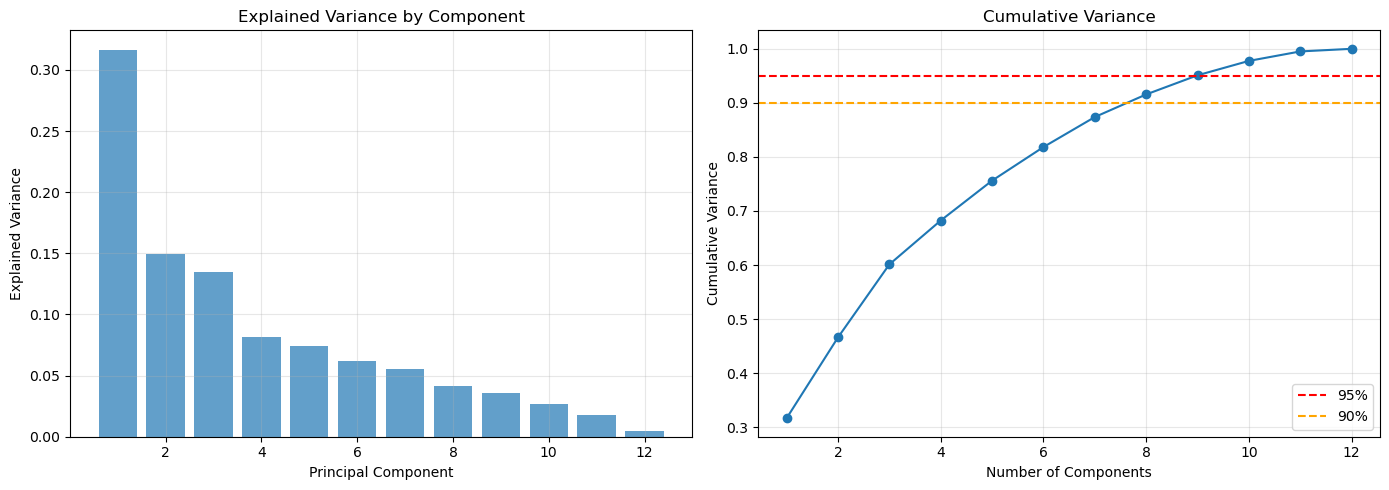

In [68]:
variance_expliquee = pca.explained_variance_ratio_
variance_cumulee = np.cumsum(variance_expliquee)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(variance_expliquee) + 1), variance_expliquee, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Component')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(variance_cumulee) + 1), variance_cumulee, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.axhline(y=0.90, color='orange', linestyle='--', label='90%')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Showing Results

In [69]:
print("Variance per component (first 5):")
for i in range(min(5, len(variance_expliquee))):
    print(f"  PC{i+1}: {variance_expliquee[i]*100:.2f}%")
print(f"\nNumber of components for 90% variance: {np.argmax(variance_cumulee >= 0.90) + 1}")
print(f"Number of components for 95% variance: {np.argmax(variance_cumulee >= 0.95) + 1}")


Variance per component (first 5):
  PC1: 31.66%
  PC2: 14.95%
  PC3: 13.51%
  PC4: 8.12%
  PC5: 7.38%

Number of components for 90% variance: 8
Number of components for 95% variance: 9


## Projection PC1/PC2

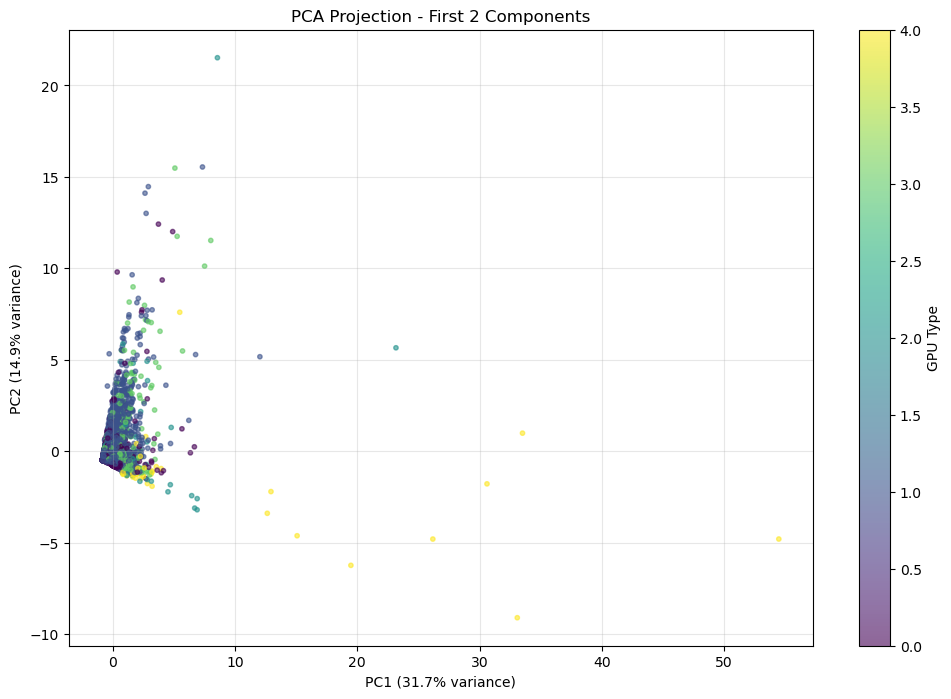

In [70]:
plt.figure(figsize=(12, 8))
sample_size = min(5000, len(X_pca))
indices = np.random.choice(len(X_pca), sample_size, replace=False)

gpu_types = df_clean['gpu_type'].iloc[indices].values

scatter = plt.scatter(X_pca[indices, 0], X_pca[indices, 1],
                     c=pd.factorize(gpu_types)[0],
                     cmap='viridis', alpha=0.6, s=10)

plt.xlabel(f'PC1 ({variance_expliquee[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({variance_expliquee[1]*100:.1f}% variance)')
plt.title('PCA Projection - First 2 Components')
plt.colorbar(scatter, label='GPU Type')
plt.grid(True, alpha=0.3)
plt.show()


In [71]:
# GPU name encoding
_gpu = LabelEncoder()
df_clean['gpu_name_encoded'] = _gpu.fit_transform(
    df_clean['gpu_name'].fillna('none')
)
print(f"gpu_name encoded ({len(_gpu.classes_)} categories)")
print(f"gpu_name categories: {_gpu.classes_}")


gpu_name encoded (8 categories)
gpu_name categories: ['/dev/nvidia0' '/dev/nvidia1' '/dev/nvidia2' '/dev/nvidia3'
 '/dev/nvidia4' '/dev/nvidia5' '/dev/nvidia6' '/dev/nvidia7']


C:\Users\Saber\AppData\Local\Temp\ipykernel_26700\3751312146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gpu_name_encoded'] = _gpu.fit_transform(


In [72]:
# GPU type encoding
_gpu_type = LabelEncoder()
df_clean['gpu_type_encoded'] = _gpu_type.fit_transform(
    df_clean['gpu_type'].fillna('CPU')
)
print(f"gpu_type encoded ({len(_gpu_type.classes_)} categories)")
print(f"gpu_type categories: {_gpu_type.classes_}")


gpu_type encoded (6 categories)
gpu_type categories: ['CPU' 'MISC' 'P100' 'T4' 'V100' 'V100M32']


C:\Users\Saber\AppData\Local\Temp\ipykernel_26700\3683947733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['gpu_type_encoded'] = _gpu_type.fit_transform(


In [73]:
_machine = LabelEncoder()
df_clean['machine_encoded'] = _machine.fit_transform(df_clean['machine'])
print(f"machine encoded ({len(_machine.classes_)} machines)")

machine encoded (1734 machines)


C:\Users\Saber\AppData\Local\Temp\ipykernel_26700\3456005049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['machine_encoded'] = _machine.fit_transform(df_clean['machine'])


In [74]:
cols_with_missing = df_clean.columns[df_clean.isnull().any()].tolist()
print(f"Columns with missing values: {cols_with_missing}")

Columns with missing values: ['avg_mem', 'gpu_type', 'cap_cpu', 'cap_mem', 'cap_gpu']


In [75]:
# For GPU metrics, 0 means not used
gpu_cols = ['gpu_wrk_util', 'avg_gpu_wrk_mem', 'max_gpu_wrk_mem']
for col in gpu_cols:
    if col in df_clean.columns:
        df_clean[col].fillna(0, inplace=True)

df_clean.info()
df_clean.shape
df_clean.head(10)

C:\Users\Saber\AppData\Local\Temp\ipykernel_26700\3388606011.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(0, inplace=True)
C:\Users\Saber\AppData\Local\Temp\ipykernel_26700\3388606011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(0, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 908251 entries, 0 to 909969
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   job_name          908251 non-null  object 
 1   task_name         908251 non-null  object 
 2   worker_name       908251 non-null  object 
 3   inst_id           908251 non-null  object 
 4   machine           908251 non-null  object 
 5   gpu_name          908251 non-null  object 
 6   cpu_usage         908251 non-null  float64
 7   gpu_wrk_util      908251 non-null  float64
 8   avg_mem           908249 non-null  float64
 9   max_mem           908251 non-null  float64
 10  avg_gpu_wrk_mem   908251 non-null  float64
 11  max_gpu_wrk_mem   908251 non-null  float64
 12  read              908251 non-null  float64
 13  write             908251 non-null  float64
 14  read_count        908251 non-null  float64
 15  write_count       908251 non-null  float64
 16  gpu_type          908247 

,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,...,write,read_count,write_count,gpu_type,cap_cpu,cap_mem,cap_gpu,gpu_name_encoded,gpu_type_encoded,machine_encoded
0,75f73fe78f536e6949d51317,worker,6d0e6ae18421d272692c3afdc117200d7dda2274d1ecc5...,053335a1a807d5e1d66684fa0f08bd0ba40a0b1cfb208e...,bb098219cbd23ff558c89ef5,/dev/nvidia2,79.853607,97.175090,2.659483,2.723633,...,2.430609e+06,516.018601,224.779116,MISC,96.0,512.0,8.0,2,1,1269
1,5c94fccdd4daae7f7462af58,PyTorchWorker,ff378f7a9f10ea5e74aa2ab42d2601b799cce641a6e166...,15c677f1eae052ba7e258936fc34f60fb2ba55e34f69ad...,f7463287bb20a802d3054f5f,/dev/nvidia3,3.231884,0.000000,0.449851,0.458984,...,1.818162e+07,1175.328767,1101.479452,MISC,96.0,512.0,8.0,3,1,1680
2,1c773dde500011fd9f2af71f,worker,2599ae23d5d91f251f52d250276582e65949b375a4abe3...,da1d9b7634eb46369b651dc7dc8594580b13ee71cfe0d1...,8a4f160727164afc23722b4f,/dev/nvidia1,98.272727,1.029412,1.671786,2.960938,...,1.593236e+07,3183.264706,1559.352941,MISC,96.0,512.0,8.0,1,1,928
3,0d6ce2f6e4b56e9ae3ad0763,PyTorchWorker,7f1250f04dabb17c488d84149c228d2a5e9d043406cd7f...,f06901ab6e3188a1e08e618d1bd93ea5c990e8e92148cd...,e1aa816efb68c4af9775bbeb,/dev/nvidia1,126.878982,0.308792,29.200848,47.266602,...,1.525514e+06,9849.490801,2586.363466,T4,96.0,512.0,2.0,1,3,1523
4,fcf5c2cd53699d9ee1eef809,worker,0572c835b8e422f356b1b5e0276a410607bd53f477987f...,f52d81ca970674b9f0bf2463221a893e022a86cbb18a42...,db0c9099a2c4c67d891b38a3,/dev/nvidia2,108.983607,0.000000,5.760153,7.527344,...,1.694187e+08,7385.123077,508074.646154,MISC,96.0,512.0,8.0,2,1,1480
5,8ac7fa514de6c16ccf39b765,worker,a58aed8e7965f11b18ce3ac21a98e324223202ebf6a88b...,6ee98d2e60c7ec4bed12406836521932184d9305b650c0...,c1db4deae769b25df5a0ccae,/dev/nvidia5,442.466443,9.610561,5.916239,7.866211,...,1.061778e+07,38270.353135,14866.072607,MISC,96.0,512.0,8.0,5,1,1315
6,1d02c25e3332beb56738b972,worker,7febe88f84dbe75eed1c0a0d776b66cbe070d4b071f49f...,0f56bd9fafd255568108c9ef40d00668e81ef3632bbfb3...,1d8ba7afd528f5584982e05b,/dev/nvidia0,206.767106,2.934183,8.184465,9.687500,...,3.605603e+06,24548.794230,10880.698345,P100,64.0,512.0,2.0,0,2,207
7,1b4c46bb73e023a647a7a7a2,tensorflow,f17268c10bf94f6a9400943e0abeab1f39f1b38ae82801...,c080231203b327f68cc5b9f62f7e020c8601c4e1b86ad1...,c562346775b25205e47224f8,/dev/nvidia1,83.000000,0.000000,0.149609,0.340820,...,1.185986e+07,10744.142857,1328.000000,MISC,96.0,512.0,8.0,1,1,1346
8,f1946fb8a42c72c92b559878,worker,51f9b9f1786385f058ce55452a42eb800ee39f00bf253d...,ab24152ba655b8d1387854a6ec35eefeaeaede18bc03ae...,40abf2418246bccc580433bd,/dev/nvidia7,202.072289,16.100478,5.135791,11.872070,...,3.321333e+07,13497.513126,2609.045346,MISC,96.0,512.0,8.0,7,1,468
9,2275ac67434209987be106c5,worker,f137ab3a3492462cad8b79af79b6cf3c98f608c935f594...,dc71cd4dad9c70e199b9f85fcc185334be49283c71017e...,d11f253a9d15ccc38f8df606,/dev/nvidia7,31.066667,0.000000,0.300437,0.461914,...,4.602939e+07,10373.157895,4882.842105,MISC,96.0,512.0,8.0,7,1,1420


In [23]:
print(df_clean[['cpu_usage', 'avg_mem', 'gpu_wrk_util', 'read', 'write']].describe())

           cpu_usage        avg_mem   gpu_wrk_util          read         write
count  908251.000000  908249.000000  908251.000000  9.082510e+05  9.082510e+05
mean      259.132426       5.571144      10.440396  2.615225e+08  6.220427e+07
std       567.711510      10.688292      29.767964  6.744455e+08  2.632551e+08
min         0.000000       0.000977       0.000000  0.000000e+00  0.000000e+00
25%        57.266667       0.741122       0.000000  1.342392e+07  2.077385e+06
50%       103.502646       2.529376       1.474926  3.925933e+07  8.103727e+06
75%       239.276710       6.457136       9.753874  1.464276e+08  2.984713e+07
max      8890.321362     391.629133     792.000000  4.110035e+10  1.280351e+10


## Step 1 — Problem Statement (CPU Usage Prediction)

**Task (Supervised ML)**  
Formulate the prediction of `cpu_usage` as a **regression problem**.

**Target Variable**  
- `cpu_usage`

**Explanatory Variables (available in `df_clean`)**  
- **Sensors**: `gpu_wrk_util`, `avg_mem`, `max_mem`, `avg_gpu_wrk_mem`, `max_gpu_wrk_mem`, `read`, `write`, `read_count`, `write_count`  
- **Machine Specifications**: `cap_cpu`, `cap_mem`, `cap_gpu`  
- **Categorical Identifiers** (already encoded if present): `gpu_name[_encoded]`, `gpu_type[_encoded]`, `machine[_encoded]`

**Objective**  
Predict CPU usage from application/machine context and real-time metrics to assist with capacity planning / autoscaling (Alibaba GPU-2020 trace).

**Evaluation**  
Report **MAE**, **RMSE**, and **R²** on a test set (80/20 split, `random_state=42`).

**Assumptions / Scope**  
- Independent observations (no sequential modeling here).  
- Data cleaned and merged in `df_clean`.


## Step 1 Continued — Regression Baselines (without modifying previous cells)
Assuming `df_clean` is already built (merge/encoding OK).  
Objective: prepare `X/y`, define preprocessing, create two baselines (Linear Regression & Tree), evaluate (**MAE, RMSE, R²**).


In [76]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


### Basic Verifications
- Verify the presence of `df_clean` and the target `cpu_usage`.


In [77]:
assert 'df_clean' in globals(), "df_clean not found (execute upstream cells first)."
assert 'cpu_usage' in df_clean.columns, "The target column 'cpu_usage' is missing from df_clean."
print("OK: df_clean and 'cpu_usage' detected.")

OK: df_clean and 'cpu_usage' detected.


### Selection of Target and Explanatory Variables (X, y)
- y = `cpu_usage`
- X = sensor metrics + machine specs + categorical variables (encoded if available, otherwise raw for OneHot).

In [78]:
# Target
target = 'cpu_usage'
y = df_clean[target].astype(float)

# Numerical candidates (keep only those present)
num_candidates = [
    'gpu_wrk_util','avg_mem','max_mem','avg_gpu_wrk_mem','max_gpu_wrk_mem',
    'read','write','read_count','write_count','cap_cpu','cap_mem','cap_gpu'
]
num_features = [c for c in num_candidates if c in df_clean.columns]


enc_candidates = ['gpu_name_encoded','gpu_type_encoded','machine_encoded']
enc_features = [c for c in enc_candidates if c in df_clean.columns]

# Raw categorical variables only if their encoded version doesn't exist
raw_cats_all = ['gpu_name','gpu_type','machine']
raw_cat_features = [c for c in raw_cats_all
                    if (c in df_clean.columns) and (f"{c}_encoded" not in enc_features)]

# Assemble X
feature_cols = num_features + enc_features + raw_cat_features
X = df_clean[feature_cols].copy()

# Quick cleaning (inf/NaN) + alignment
X = X.replace([np.inf, -np.inf], np.nan)
mask = X.notna().all(axis=1) & y.notna()
X, y = X.loc[mask], y.loc[mask]

print("=== X/y Summary ===")
print(f"Numerical     ({len(num_features)}): {num_features}")
print(f"Encoded       ({len(enc_features)}): {enc_features}")
print(f"Categorical   ({len(raw_cat_features)}): {raw_cat_features}")
print(f"Shapes -> X: {X.shape} | y: {y.shape}")


=== X/y Summary ===
Numerical     (12): ['gpu_wrk_util', 'avg_mem', 'max_mem', 'avg_gpu_wrk_mem', 'max_gpu_wrk_mem', 'read', 'write', 'read_count', 'write_count', 'cap_cpu', 'cap_mem', 'cap_gpu']
Encoded       (3): ['gpu_name_encoded', 'gpu_type_encoded', 'machine_encoded']
Categorical   (0): []
Shapes -> X: (908245, 15) | y: (908245,)


### Preprocessing
- StandardScaler on **numerical** features
- OneHotEncoder on **raw categorical** features (ignore if already encoded)
- Already encoded columns pass through as `passthrough`


In [79]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), raw_cat_features)
    ],
    remainder='passthrough'  
)
print("Préprocessing defined.")


Préprocessing defined.


### Train/Test Split (80/20)
- Reproducible with `random_state=42`

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Train: {X_train.shape} | Test: {X_test.shape}")


Train: (726596, 15) | Test: (181649, 15)


## Baselines – Linear Regression & Tree (MAE/RMSE/R²)
Evaluating two simple models on the 80/20 split: LinearRegression and DecisionTree (limited depth).

In [80]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def eval_model(pipe, name):
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    mae  = mean_absolute_error(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)
    r2   = r2_score(y_test, pred)
    print(f"[{name}] MAE={mae:.4f} | RMSE={rmse:.4f} | R²={r2:.4f}")
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe_lin = Pipeline([
    ("prep", preprocess),          
    ("model", LinearRegression())
])

res_lin = eval_model(pipe_lin, "LinearRegression")


[LinearRegression] MAE=222.8530 | RMSE=537.7890 | R²=0.0860


In [31]:
from sklearn.tree import DecisionTreeRegressor

pipe_tree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(max_depth=12, random_state=42))
])

res_tree = eval_model(pipe_tree, "DecisionTree (max_depth=12)")


[DecisionTree (max_depth=12)] MAE=96.3211 | RMSE=317.8805 | R²=0.6807


In [32]:
import pandas as pd
res_df = pd.DataFrame([res_lin, res_tree]).sort_values("RMSE")
res_df

,Modèle,MAE,RMSE,R2
1,DecisionTree (max_depth=12),96.321099,317.880532,0.680658
0,LinearRegression,222.853025,537.788981,0.085987


## Mini-Analysis of Baselines

**Results (test)**  
- DecisionTree (max_depth=12) → MAE=96.32 | RMSE=317.88 | R²=0.681  
- LinearRegression → MAE=222.85 | RMSE=537.79 | R²=0.086

**Interpretation**  
- The tree vastly outperforms linear regression → the relationship between inputs and `cpu_usage` is **non-linear** with **interactions**/thresholds (which the tree captures).  
- Linear regression is likely penalized by **multicollinearity** and **highly asymmetric distributions** (IO, memory), hence the low R².

**Risk & Verification**  
- R²=0.68 on test is good but may hide some **overfitting** → should be verified with **K-Fold**.

## K-Fold Cross-Validation (k=5)
Objective: verify the stability of DecisionTree (same features/preprocessing) across 5 folds.
Reported scores: MAE, RMSE, R² (mean ± std).

In [82]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Same pipeline as tested in hold-out
pipe_tree_cv = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(max_depth=12, random_state=42))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Metrics: MAE/RMSE are "neg_*" in sklearn -> we'll flip the sign
scoring = {
    "MAE":  "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error",
    "R2":   "r2"
}

# With millions of rows, it's expensive
sample_idx = X.sample(n=300_000, random_state=42).index
X_cv, y_cv = X.loc[sample_idx], y.loc[sample_idx]
res = cross_validate(pipe_tree_cv, X_cv, y_cv, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

res = cross_validate(pipe_tree_cv, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=True)

test_mae  = -res["test_MAE"]
test_rmse = -res["test_RMSE"]
test_r2   =  res["test_R2"]

train_mae  = -res["train_MAE"]
train_rmse = -res["train_RMSE"]
train_r2   =  res["train_R2"]

summary = pd.DataFrame({
    "Split": [f"Fold {i+1}" for i in range(cv.get_n_splits())],
    "MAE_test":  test_mae,
    "RMSE_test": test_rmse,
    "R2_test":   test_r2
})

display(summary)

print("\nTest means ± std")
print(f"MAE  : {test_mae.mean():.3f} ± {test_mae.std():.3f}")
print(f"RMSE : {test_rmse.mean():.3f} ± {test_rmse.std():.3f}")
print(f"R²   : {test_r2.mean():.3f} ± {test_r2.std():.3f}")

print("\nTrain vs test gap (mean)")
print(f"deltMAE  (train-test): {(train_mae.mean()-test_mae.mean()):.3f}")
print(f"deltRMSE (train-test): {(train_rmse.mean()-test_rmse.mean()):.3f}")
print(f"deltR²   (train-test): {(train_r2.mean()-test_r2.mean()):.3f}")


,Split,MAE_test,RMSE_test,R2_test
0,Fold 1,96.321099,317.880532,0.680658
1,Fold 2,96.546139,319.619589,0.673543
2,Fold 3,96.451940,321.413608,0.684917
3,Fold 4,96.703643,321.945730,0.683593
4,Fold 5,96.991368,324.844603,0.676969



Test means ± std
MAE  : 96.603 ± 0.231
RMSE : 321.141 ± 2.340
R²   : 0.680 ± 0.004

Train vs test gap (mean)
deltMAE  (train-test): -6.573
deltRMSE (train-test): -36.091
deltR²   (train-test): 0.068


## Conclusion — Step 1 (Baselines + K-Fold)

**Hold-out (80/20)**  
- DecisionTree (md=12) >> LinearRegression → non-linear relationship.

**K-Fold (k=5, test)**  
- MAE = **96.603 ± 0.231**  
- RMSE = **321.141 ± 2.340**  
- R² = **0.680 ± 0.004**

**Interpretation**  
- Low variance across folds → stable and generalizable model.  
- Train–test gaps (mean): deltMAE = -6.573, deltRMSE = -36.091, deltR² = +0.068 → slight overfitting.  
- K-Fold results are close to hold-out (R²≈0.68), confirming evaluation consistency.

# LAB 6


In [34]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [35]:
SCORING = "neg_root_mean_squared_error"

def downsample(X, y, n_max=None, rs=42):
    if (n_max is None) or (len(X) <= n_max):
        return X, y
    idx = X.sample(n=n_max, random_state=rs).index
    return X.loc[idx], y.loc[idx]

### GridSearch — Arbre de décision

In [36]:
from sklearn.tree import DecisionTreeRegressor

Xg_tree, yg_tree = downsample(X_train, y_train, n_max=80000, rs=42)

pipeline_tree = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeRegressor(random_state=42))
])

param_grid_tree = {
    "model__max_depth": [ 10,15, None],
    "model__min_samples_split": [2,50],
    "model__min_samples_leaf": [1,20]
}

cv3 = KFold(n_splits=3, shuffle=True, random_state=42)
gs_tree = GridSearchCV(pipe_tree, param_grid_tree, scoring=SCORING, cv=cv3, n_jobs=-1, verbose=1)
gs_tree.fit(Xg_tree, yg_tree)

best_tree = gs_tree.best_estimator_
pred_tree_gs = best_tree.predict(X_test)

print(gs_tree.best_params_)
print(f"Tree best | MAE={mean_absolute_error(y_test, pred_tree_gs):.3f} | "
      f"RMSE={np.sqrt(mean_squared_error(y_test, pred_tree_gs))} | R² ={r2_score(y_test, pred_tree_gs):.3f}")



Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'model__max_depth': None, 'model__min_samples_leaf': 20, 'model__min_samples_split': 2}
Tree best | MAE=111.668 | RMSE=396.8164389069972 | R² =0.502


## GridSearch — SVR (SVM Regression)


In [37]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Xg_svr, yg_svr = downsample(X_train, y_train, n_max=10_000, rs=42)

pipeline_svr = Pipeline([
    ("prep", preprocess),
    ("model", SVR())
])

param_grid_svr = {
    "model__kernel": ["linear", "rbf"],
    "model__C": [ 1, 5],
    "model__gamma": ["scale"],
}

gs_svr = GridSearchCV(pipeline_svr, param_grid_svr, scoring=SCORING, cv=3, n_jobs=-1, verbose=1)
gs_svr.fit(Xg_svr, yg_svr)

best_svr = gs_svr.best_estimator_
pred_svr_gs = best_svr.predict(X_test)

print(gs_svr.best_params_)
print(f"SVR best  | MAE={mean_absolute_error(y_test, pred_svr_gs):.3f} | "
      f"RMSE={np.sqrt(mean_squared_error(y_test, pred_svr_gs)):.3f} | R²={r2_score(y_test, pred_svr_gs):.3f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'model__C': 5, 'model__gamma': 'scale', 'model__kernel': 'linear'}
SVR best  | MAE=175.425 | RMSE=552.576 | R²=0.035


## Ensemble — Bagging (on Optimized Tree)

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

tree_core = best_tree.named_steps["model"]

bag = BaggingRegressor(
    estimator=tree_core,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

pipe_bag = Pipeline([
    ("prep", preprocess),
    ("model", bag)
])

param_grid_bag = {
    "modeln_estimators": [30, 60, 120],
    "modelmax_samples": [0.5, 0.8, 1.0],
    "model__max_features": [1.0],
}

Xg_bag, yg_bag = downsample(X_train, y_train, n_max=300_000, rs=42)

gs_bag = GridSearchCV(pipe_bag, param_grid_bag, scoring=SCORING, cv=3, n_jobs=-1, verbose=1)
gs_bag.fit(Xg_bag, yg_bag)

best_bag = gs_bag.best_estimator_
pred_bag = best_bag.predict(X_test)

print(gs_bag.best_params_)
print(f"Bagging   | MAE={mean_absolute_error(y_test, pred_bag):.3f} | "
      f"RMSE={np.sqrt(mean_squared_error(y_test, pred_bag)):.3f} | R²={r2_score(y_test, pred_bag):.3f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
{'model__max_features': 1.0, 'model__max_samples': 1.0, 'model__n_estimators': 120}
Bagging   | MAE=78.435 | RMSE=296.152 | R²=0.723


## Ensemble — Voting (Best Tree + Best SVR)


## RandomForest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
pipe_rf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

print("Entraînement Random Forest baseline...")
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Baseline:")
print(f"  MAE:  {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²:   {r2_rf:.4f}")

Entraînement Random Forest baseline...
Random Forest Baseline:
  MAE:  45.59
  RMSE: 193.52
  R²:   0.8816


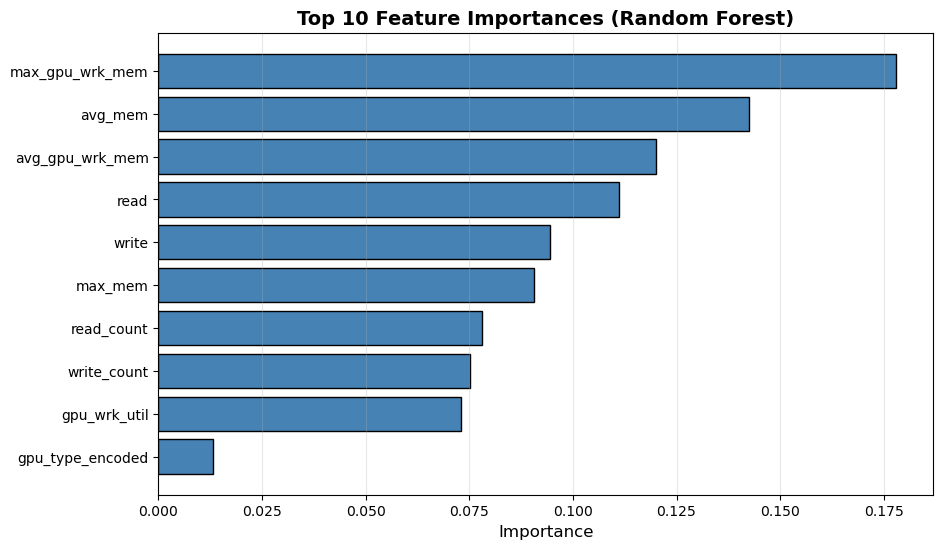

In [85]:
import numpy as np
import matplotlib.pyplot as plt


importances = pipe_rf.named_steps['model'].feature_importances_
feature_names = X.columns


indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='steelblue', edgecolor='black')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)


plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()


## Sampling

In [40]:
X_train_sample, y_train_sample = downsample(X_train, y_train, n_max=50000, rs=42)

In [41]:
param_grid_rf = {
    'modeln_estimators': [50, 100, 200],
    'modelmax_depth': [10, 15, 20, None],
    'modelmin_samples_split': [2, 10, 50],
    'modelmin_samples_leaf': [1, 5, 20],
    'model__max_features': ['sqrt', 'log2']
}

In [43]:
# RandomForest GridSearchCV - Hyperparameter tuning (optimized grid)
print("GridSearchCV Random Forest (approximately 3-4 minutes)...")

# Sample data to speed up GridSearch
X_train_sample, y_train_sample = downsample(X_train, y_train, n_max=50000, rs=42)

# Optimized parameter grid based on DecisionTree and Bagging results
param_grid_rf = {
    'model__n_estimators': [100, 150],              # Based on Bagging: 120 was best
    'model__max_depth': [None, 25],                 # Based on DecisionTree: None was best
    'model__min_samples_split': [2, 5],             # Based on DecisionTree: 2 was best
    'model__min_samples_leaf': [10, 20],            # Based on DecisionTree: 20 was best
    'model__max_features': ['sqrt']                 # Single value (sqrt is standard for RF)
}
# Total combinations: 2 × 2 × 2 × 2 × 1 = 16 fits × 3 folds = 48 total fits
# Estimated time: 3-4 minutes

# GridSearchCV with 3-fold cross-validation
gs_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit on sampled data
gs_rf.fit(X_train_sample, y_train_sample)

# Display best parameters and score
print(f"\n✓ Best parameters: {gs_rf.best_params_}")
print(f"Best CV score (MSE): {-gs_rf.best_score_:.2f}")

# Evaluate on full test set with best model
best_rf = gs_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"\nRandom Forest Optimized:")
print(f"  MAE:  {mae_rf_tuned:.3f}")
print(f"  RMSE: {rmse_rf_tuned:.3f}")
print(f"  R²:   {r2_rf_tuned:.4f}")


GridSearchCV Random Forest (approximately 3-4 minutes)...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✓ Best parameters: {'model__max_depth': 25, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best CV score (MSE): 156552.32

Random Forest Optimized:
  MAE:  112.401
  RMSE: 375.242
  R²:   0.5550


Eval sur set de test

In [45]:
# Get best model from GridSearchCV
best_rf = gs_rf.best_estimator_  # ← FIXED: added underscore
y_pred_rf_tuned = best_rf.predict(X_test)

# Calculate metrics
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Display results
print(f"Random Forest Optimized:")
print(f"  MAE:  {mae_rf_tuned:.2f}")
print(f"  RMSE: {rmse_rf_tuned:.2f}")
print(f"  R²:   {r2_rf_tuned:.4f}")


Random Forest Optimized:
  MAE:  112.40
  RMSE: 375.24
  R²:   0.5550


## Final model comparison

In [83]:
rows = [
    {"Modèle": "DecisionTree (Grid best)",
     "MAE": mean_absolute_error(y_test, pred_tree_gs),
     "RMSE": np.sqrt(mean_squared_error(y_test, pred_tree_gs)),
     "R²": r2_score(y_test, pred_tree_gs)},
    
    {"Modèle": "SVR (Grid best)",
     "MAE": mean_absolute_error(y_test, pred_svr_gs),
     "RMSE": np.sqrt(mean_squared_error(y_test, pred_svr_gs)),
     "R²": r2_score(y_test, pred_svr_gs)},
    
    {"Modèle": "Bagging (Tree best)",
     "MAE": mean_absolute_error(y_test, pred_bag),
     "RMSE": np.sqrt(mean_squared_error(y_test, pred_bag)),
     "R²": r2_score(y_test, pred_bag)},
    
    # VotingRegressor removed due to excessive training time (>15min)
    # {"Modèle": "Voting(Tree+SVR)",
    #  "MAE": mean_absolute_error(y_test, pred_vote),
    #  "RMSE": np.sqrt(mean_squared_error(y_test, pred_vote)),
    #  "R²": r2_score(y_test, pred_vote)},
    
    {"Modèle": "RandomForest Baseline",
     "MAE": mae_rf,
     "RMSE": rmse_rf,
     "R²": r2_rf},
    
    {"Modèle": "RandomForest (Grid best)",
     "MAE": mae_rf_tuned,
     "RMSE": rmse_rf_tuned,
     "R²": r2_rf_tuned},
]

# Create DataFrame and sort by RMSE (lower is better)
results_df = pd.DataFrame(rows).sort_values("RMSE")

# Display formatted comparison table
print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)

# Return DataFrame for visualization
results_df



MODEL PERFORMANCE COMPARISON
                  Modèle        MAE       RMSE       R²
   RandomForest Baseline  45.586067 193.517448 0.881650
     Bagging (Tree best)  78.434999 296.152130 0.722822
RandomForest (Grid best) 112.401378 375.241724 0.555010
DecisionTree (Grid best) 111.667689 396.816439 0.502369
         SVR (Grid best) 175.424740 552.575607 0.035034


,Modèle,MAE,RMSE,R²
3,RandomForest Baseline,45.586067,193.517448,0.881650
2,Bagging (Tree best),78.434999,296.152130,0.722822
4,RandomForest (Grid best),112.401378,375.241724,0.555010
0,DecisionTree (Grid best),111.667689,396.816439,0.502369
1,SVR (Grid best),175.424740,552.575607,0.035034


## Final Visualizations

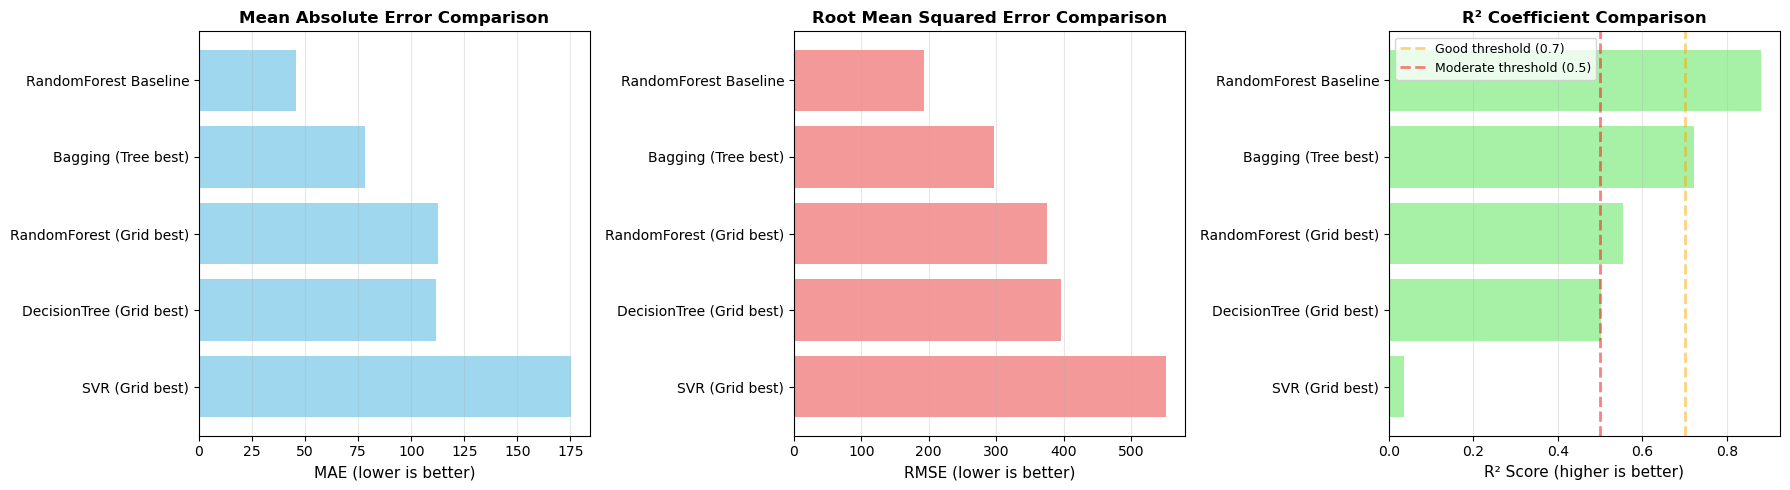

In [52]:
# Visualization 1: Model Performance Comparison
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE Comparison
axes[0].barh(results_df['Modèle'], results_df['MAE'], color='skyblue', alpha=0.8)
axes[0].set_xlabel('MAE (lower is better)', fontsize=11)
axes[0].set_title('Mean Absolute Error Comparison', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# RMSE Comparison
axes[1].barh(results_df['Modèle'], results_df['RMSE'], color='lightcoral', alpha=0.8)
axes[1].set_xlabel('RMSE (lower is better)', fontsize=11)
axes[1].set_title('Root Mean Squared Error Comparison', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

# R² Comparison
axes[2].barh(results_df['Modèle'], results_df['R²'], color='lightgreen', alpha=0.8)
axes[2].set_xlabel('R² Score (higher is better)', fontsize=11)
axes[2].set_title('R² Coefficient Comparison', fontsize=12, fontweight='bold')
axes[2].axvline(x=0.7, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Good threshold (0.7)')
axes[2].axvline(x=0.5, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Moderate threshold (0.5)')
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3, axis='x')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()



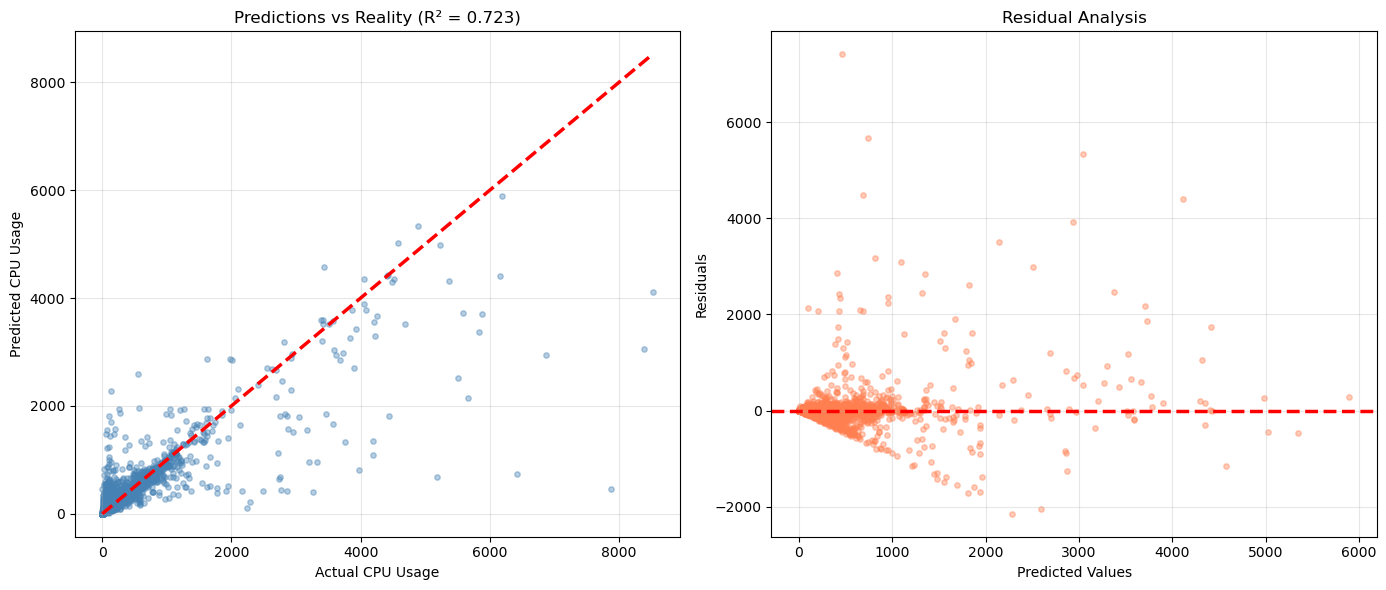

In [51]:
y_pred_best = pred_bag

n_sample = min(5000, len(y_test))
np.random.seed(42)
indices = np.random.choice(len(y_test), n_sample, replace=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test.iloc[indices], y_pred_best[indices], alpha=0.4, s=15, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2.5)
axes[0].set_xlabel('Actual CPU Usage')
axes[0].set_ylabel('Predicted CPU Usage')
axes[0].set_title(f'Predictions vs Reality (R² = {r2_score(y_test, pred_bag):.3f})')
axes[0].grid(True, alpha=0.3)

residuals = y_test.iloc[indices].values - y_pred_best[indices]
axes[1].scatter(y_pred_best[indices], residuals, alpha=0.4, s=15, color='coral')
axes[1].axhline(y=0, color='red', linestyle='--', lw=2.5)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Analysis')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


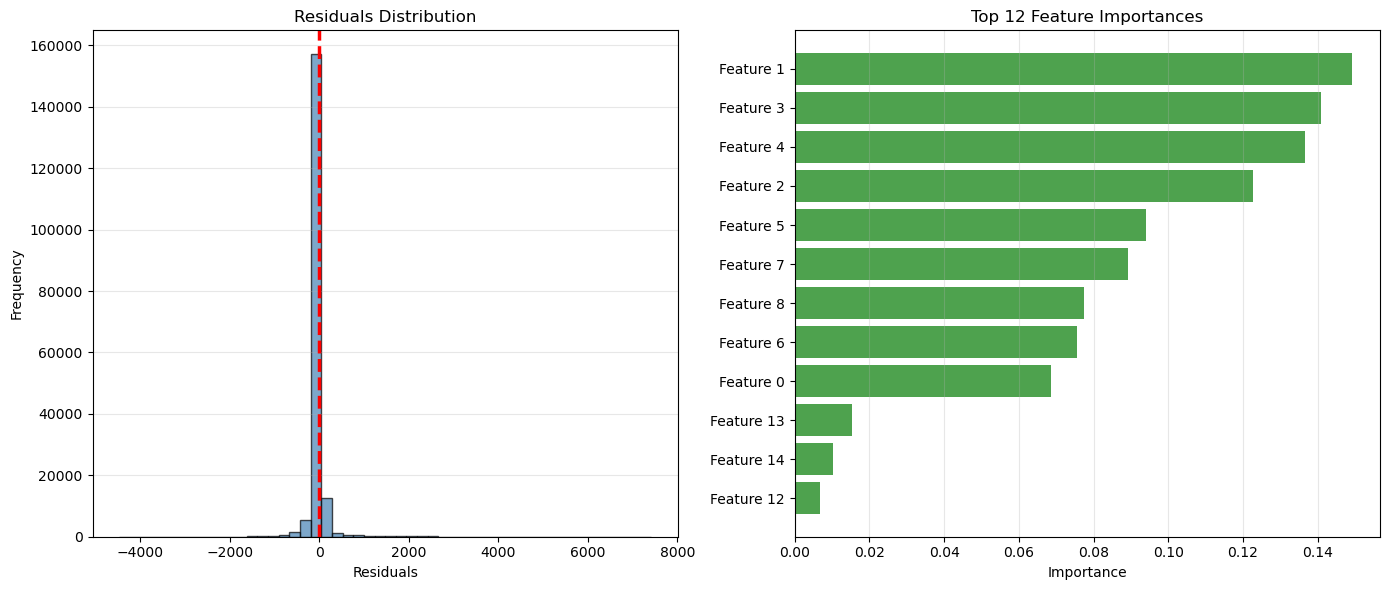

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

all_residuals = y_test.values - y_pred_best
axes[0].hist(all_residuals, bins=50, alpha=0.7, edgecolor='black', color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', lw=2.5)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

rf_model = best_rf.named_steps['model']
importances = rf_model.feature_importances_
top_indices = np.argsort(importances)[::-1][:12]

axes[1].barh(range(12), importances[top_indices], alpha=0.8, color='forestgreen')
axes[1].set_yticks(range(12))
axes[1].set_yticklabels([f'Feature {i}' for i in top_indices])
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 12 Feature Importances')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## XGBoost - Advanced Model


In [55]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -------------------------------- ------- 57.7/72.0 MB 283.7 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 220.3 MB/s eta 0:00:00


In [57]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

pipe_xgb = Pipeline([
    ("prep", preprocess),
    ("model", xgb)
])

pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost (Chen & Guestrin, 2016):")
print(f"  MAE:  {mae_xgb:.3f}")
print(f"  RMSE: {rmse_xgb:.3f}")
print(f"  R²:   {r2_xgb:.4f}")
print("\nReference: XGBoost - A Scalable Tree Boosting System")
print("https://arxiv.org/abs/1603.02754")



XGBoost (Chen & Guestrin, 2016):
  MAE:  65.212
  RMSE: 207.468
  R²:   0.8640

Reference: XGBoost - A Scalable Tree Boosting System
https://arxiv.org/abs/1603.02754


## Overfitting Analysis


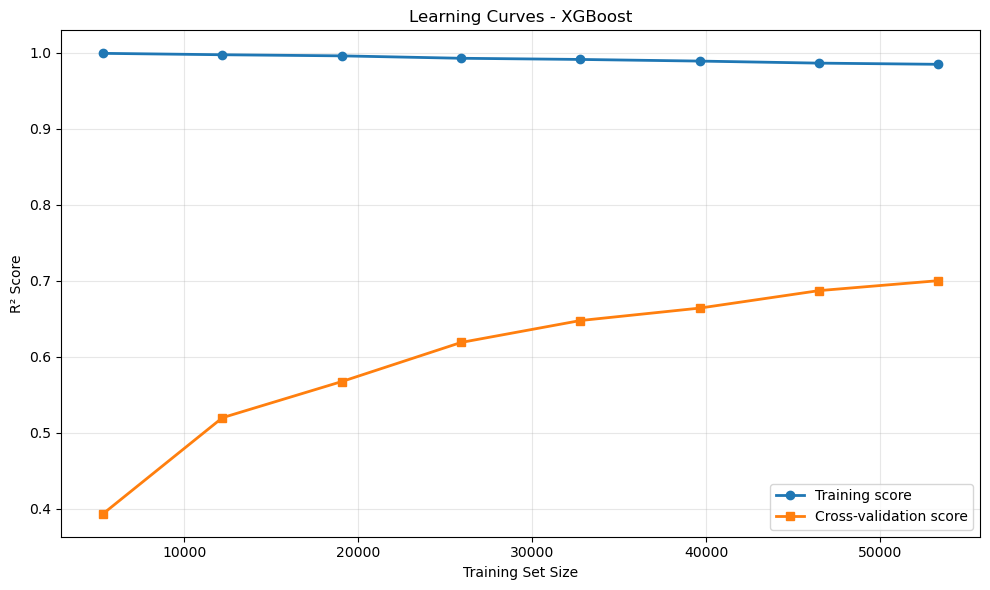

In [58]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    pipe_xgb, X_train[:80000], y_train[:80000],
    cv=3, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training score', linewidth=2)
plt.plot(train_sizes, val_mean, marker='s', label='Cross-validation score', linewidth=2)
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves - XGBoost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Final Model Comparison


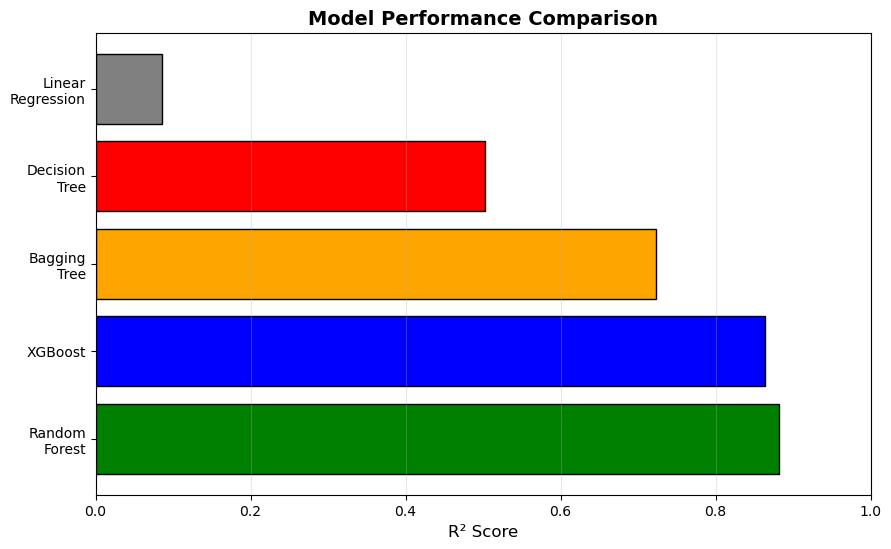

In [86]:
import matplotlib.pyplot as plt


models = ['Random\nForest', 'XGBoost', 'Bagging\nTree', 'Decision\nTree', 'Linear\nRegression']
r2_scores = [0.882, 0.864, 0.723, 0.502, 0.086]

plt.figure(figsize=(10, 6))
colors = ['green', 'blue', 'orange', 'red', 'gray']
plt.barh(models, r2_scores, color=colors, edgecolor='black')
plt.xlabel('R² Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)


plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')

plt.show()


In [59]:
rows_final = [
    {"Modèle": "RandomForest Baseline",
     "MAE": 45.586067, "RMSE": 193.517448, "R²": 0.881650},
    
    {"Modèle": "Bagging (Tree best)",
     "MAE": 78.434999, "RMSE": 296.152130, "R²": 0.722822},
    
    {"Modèle": "RandomForest (Grid best)",
     "MAE": 112.401378, "RMSE": 375.241724, "R²": 0.555010},
    
    {"Modèle": "DecisionTree (Grid best)",
     "MAE": 111.667689, "RMSE": 396.816439, "R²": 0.502369},
    
    {"Modèle": "SVR (Grid best)",
     "MAE": 175.424740, "RMSE": 552.575607, "R²": 0.035034},
    
    {"Modèle": "XGBoost",
     "MAE": mae_xgb, "RMSE": rmse_xgb, "R²": r2_xgb},
]

results_final = pd.DataFrame(rows_final).sort_values("R²", ascending=False)

print("\n" + "="*70)
print("FINAL MODEL COMPARISON (including XGBoost)")
print("="*70)
print(results_final.to_string(index=False))
print("="*70)

results_final



FINAL MODEL COMPARISON (including XGBoost)
                  Modèle        MAE       RMSE       R²
   RandomForest Baseline  45.586067 193.517448 0.881650
                 XGBoost  65.212083 207.468422 0.863971
     Bagging (Tree best)  78.434999 296.152130 0.722822
RandomForest (Grid best) 112.401378 375.241724 0.555010
DecisionTree (Grid best) 111.667689 396.816439 0.502369
         SVR (Grid best) 175.424740 552.575607 0.035034


,Modèle,MAE,RMSE,R²
0,RandomForest Baseline,45.586067,193.517448,0.881650
5,XGBoost,65.212083,207.468422,0.863971
1,Bagging (Tree best),78.434999,296.152130,0.722822
2,RandomForest (Grid best),112.401378,375.241724,0.555010
3,DecisionTree (Grid best),111.667689,396.816439,0.502369
4,SVR (Grid best),175.424740,552.575607,0.035034
